In [14]:
import os
import shutil
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [10]:
def create_model(name):
    model = models.Sequential(name=name)
    model.add(layers.InputLayer(input_shape=(50, 50, 3), name=f'{name}_input_layer'))
    model.add(layers.Conv2D(16, (3, 3), activation='relu', name=f'{name}_Conv2D_1'))
    model.add(layers.MaxPooling2D((2, 2), name=f'{name}_MaxPool2D_1'))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', name=f'{name}_Conv2D_2'))
    model.add(layers.MaxPooling2D((2, 2), name=f'{name}_MaxPool2D_2'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', name=f'{name}_Conv2D_3'))
    model.add(layers.MaxPooling2D((2, 2), name=f'{name}_MaxPool2D_3'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', name=f'{name}_Conv2D_4'))
    model.add(layers.MaxPooling2D((2, 2), name=f'{name}_MaxPool2D_4'))
    model.add(layers.Flatten(name=f'{name}_Flatten'))
    model.add(layers.Dense(128, activation='relu', name=f'{name}_Dense_1'))
    model.add(layers.Dense(512, activation='relu', name=f'{name}_Dense_2'))
    model.add(layers.Dense(3, activation='sigmoid', name=f'{name}_Output'))
    return model

In [11]:
centralized_model = create_model('centralized_model')
centralized_model.summary()

Model: "centralized_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 centralized_model_Conv2D_1   (None, 48, 48, 16)       448       
 (Conv2D)                                                        
                                                                 
 centralized_model_MaxPool2D  (None, 24, 24, 16)       0         
 _1 (MaxPooling2D)                                               
                                                                 
 centralized_model_Conv2D_2   (None, 22, 22, 32)       4640      
 (Conv2D)                                                        
                                                                 
 centralized_model_MaxPool2D  (None, 11, 11, 32)       0         
 _2 (MaxPooling2D)                                               
                                                                 
 centralized_model_Conv2D_3   (None, 9, 9, 64)   

2022-12-12 09:24:12.125328: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-12 09:24:12.158715: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-12 09:24:12.159130: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-12 09:24:12.159833: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

In [12]:
initial_weights = centralized_model.get_weights()

In [15]:
pickle.dump(initial_weights, open('init_weights.pkl', 'wb'))

In [16]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,)

val_datagen = ImageDataGenerator(
        rescale=1./255)

test_datagen = ImageDataGenerator(
        rescale=1./255)

In [17]:
data_path = '/home/dhianeifar/PycharmProjects/fedLearning/data/CENTRALIZED'

In [18]:
train_generator = train_datagen.flow_from_directory(
    directory=os.path.join(data_path, 'train'),
    target_size=(50, 50),
    color_mode="rgb",
    batch_size=16,
    class_mode="categorical",
)

val_generator = val_datagen.flow_from_directory(
    directory=os.path.join(data_path, 'val'),
    target_size=(50, 50),
    color_mode="rgb",
    batch_size=16,
    class_mode="categorical",
)

test_generator = test_datagen.flow_from_directory(
    directory=os.path.join(data_path, 'test'),
    target_size=(50, 50),
    color_mode="rgb",
    batch_size=16,
    class_mode="categorical",
)

Found 3825 images belonging to 3 classes.
Found 819 images belonging to 3 classes.
Found 823 images belonging to 3 classes.


In [19]:
centralized_model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
STEP_SIZE_TRAIN = train_generator.n // train_generator.batch_size
STEP_SIZE_VALID = val_generator.n // val_generator.batch_size
history = centralized_model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=val_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=20
)

Epoch 1/20


/tmp/ipykernel_16614/572934064.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = centralized_model.fit_generator(generator=train_generator,
2022-12-12 09:26:31.007041: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8401


239/239 [==============================] - 7s 21ms/step - loss: 1.0343 - accuracy: 0.4434 - val_loss: 0.8594 - val_accuracy: 0.5919
Epoch 2/20
239/239 [==============================] - 4s 18ms/step - loss: 0.4151 - accuracy: 0.8196 - val_loss: 0.0740 - val_accuracy: 0.9767
Epoch 3/20
239/239 [==============================] - 5s 19ms/step - loss: 0.0751 - accuracy: 0.9774 - val_loss: 0.0917 - val_accuracy: 0.9632
Epoch 4/20
239/239 [==============================] - 4s 19ms/step - loss: 0.0483 - accuracy: 0.9840 - val_loss: 0.0125 - val_accuracy: 0.9951
Epoch 5/20
239/239 [==============================] - 4s 18ms/step - loss: 0.0362 - accuracy: 0.9892 - val_loss: 0.0574 - val_accuracy: 0.9865
Epoch 6/20
239/239 [==============================] - 5s 20ms/step - loss: 0.0335 - accuracy: 0.9895 - val_loss: 0.0186 - val_accuracy: 0.9939
Epoch 7/20
239/239 [==============================] - 4s 18ms/step - loss: 0.0318 - accuracy: 0.9900 - val_loss: 0.0126 - val_accuracy: 1.0000
Epoch 8/20

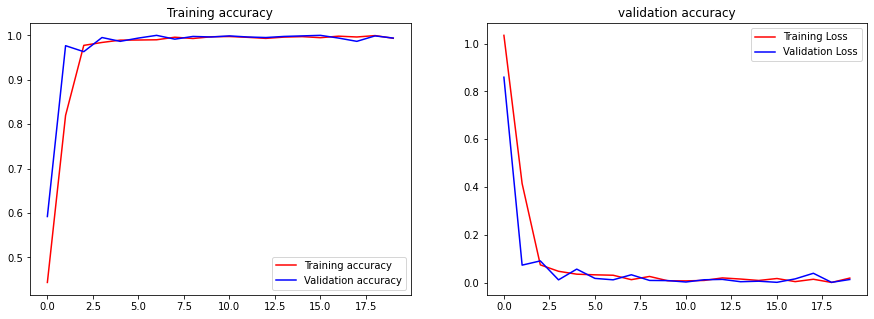

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))

ax[0].plot(epochs, acc, 'r', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
ax[0].set_title('Training accuracy')
ax[0].legend()

ax[1].plot(epochs, loss, 'r', label='Training Loss')
ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
ax[1].set_title('validation accuracy')
ax[1].legend()

In [22]:
results = centralized_model.evaluate(test_generator)

52/52 [==============================] - 0s 9ms/step - loss: 0.0081 - accuracy: 0.9976


In [23]:
results

[0.008054890669882298, 0.9975698590278625]